# Interpolation using Polynomials
[![Latest release](https://badgen.net/github/release/Naereen/Strapdown.js)](https://github.com/eabarnes1010/course_objective_analysis/tree/main/code)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/eabarnes1010/course_objective_analysis/blob/main/code/interpolation_polynomial_fitting.ipynb)


One of the most intuitive methods for interpolating may be to fit some polynomial to all of the observations that you have and then use this curve to get values between your observational points. However, this method is not great because it is pretty unstable (as shown below).

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import scipy.stats as stats

### Make-up some "observations" at 7 stations

In [16]:
x = np.array((0.,1.,2.,3.,4.,5.,7.)) #position of station
y = np.array((0.,2.,4.,3.,3.,4.,6.)) # observational value at station

Plot the data. Let's pretend "x" denotes the distance from my house (moving directly east) and "y" denotes the temperature anomaly.

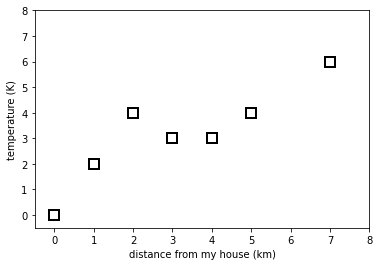

In [17]:
plt.figure()
plt.plot(x,y,'sk', markersize = 10, markerfacecolor = 'none', markeredgewidth = 2)
plt.xlim(-0.5,8.)
plt.ylim(-0.5,8.)
plt.ylabel('temperature (K)')
plt.xlabel('distance from my house (km)')
plt.show()

### Polynomial fit

Now let's do a simple polynomial fit for the data. To start, we can choose the order of our polynomial to be 5, but this can be changed.

In [18]:
poly_order = 5

Now let's use polyfit to fit the data. "xfit" denotes our fine mesh x-grid we will use to create a fully smooth polynomial after we determine the regression coefficients.

In [19]:
p = np.polyfit(x, y, poly_order, rcond=None, full=False, w=None, cov=False)

Now that we have the coefficients for our fit, let's make a smooth curve for plotting.

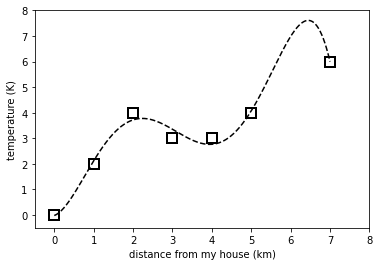

In [20]:
xfit = np.arange(0.,7.+.01,.01)
smooth_polyfit = np.poly1d(p)(xfit)

plt.figure()

plt.plot(x,y,'sk', markersize = 10, markerfacecolor = 'none', markeredgewidth = 2)
plt.plot(xfit,smooth_polyfit,'--k')

plt.xlim(-0.5,8.)
plt.ylim(-0.5,8.)
plt.ylabel('temperature (K)')
plt.xlabel('distance from my house (km)')
plt.show()




As you can see, the polynomial fit for order = 5 does a pretty nice job. So what's the problem?! Well, the issue is if you remove one of the points (say, the monitor was down that day)...

### Removing a single point

Let's remove the third point from our data (at x = 2km) and see what happens...

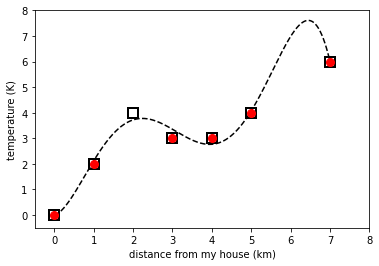

In [21]:
xnew = np.delete(x,2)
ynew = np.delete(y,2)

plt.figure()

plt.plot(x,y,'sk', markersize = 10, markerfacecolor = 'none', markeredgewidth = 2)
plt.plot(xfit,smooth_polyfit,'--k')
plt.plot(xnew,ynew,'or',markersize = 8)

plt.xlim(-0.5,8.)
plt.ylim(-0.5,8.)
plt.ylabel('temperature (K)')
plt.xlabel('distance from my house (km)')
plt.show()

What is our new polynomial fit? Performing the same analysis as above leads to...

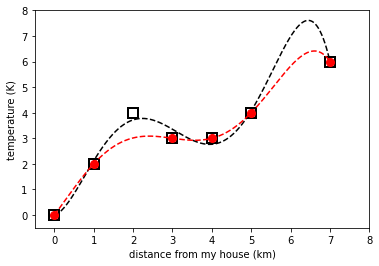

In [22]:
p = np.polyfit(xnew, ynew, poly_order, rcond=None, full=False, w=None, cov=False)
smooth_polyfit_new = np.poly1d(p)(xfit)

plt.figure()

plt.plot(x,y,'sk', markersize = 10, markerfacecolor = 'none', markeredgewidth = 2)
plt.plot(xfit,smooth_polyfit,'--k')
plt.plot(xnew,ynew,'or',markersize = 8)
plt.plot(xfit,smooth_polyfit_new,'--r')

plt.xlim(-0.5,8.)
plt.ylim(-0.5,8.)
plt.ylabel('temperature (K)')
plt.xlabel('distance from my house (km)')
plt.show()


The issue here is that while yes, the new red curve does a good job at fitting the remaining six points, the red and black curves differ wildly from each other - with the largest differences actually far from where the observation was removed. This is concerning. 

Such problems can be avoided by stepping away from polynomial fits and rather utilizing a reasonable "first guess". Then one modifies this guess when and where observations are available, and if the new data departs wildly from the first guess, one suspects that the observation may be faulty.